<a href="https://colab.research.google.com/github/Yesenia-AriasC/Curso-IA/blob/main/S2Notebook2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np
import pandas as pd
from torch.optim import optimizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Regresion lineal

In [2]:
xd = np.array([[1], [2], [3], [4]])
yd = xd*2 + 3
reg = LinearRegression()
reg.fit(xd, yd)

LinearRegression()

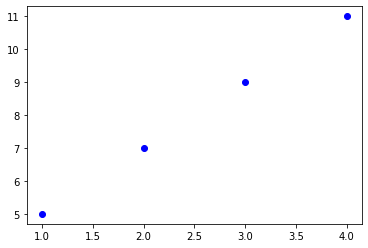

In [3]:
plt.plot([i[0] for i in xd], [i[0] for i in yd], color="blue", marker="o", linestyle="None")
plt.show()

In [5]:
x_new = [[5], [6], [7], [8]]
pr = reg.predict(np.array(x_new))
pr

array([[13.],
       [15.],
       [17.],
       [19.]])

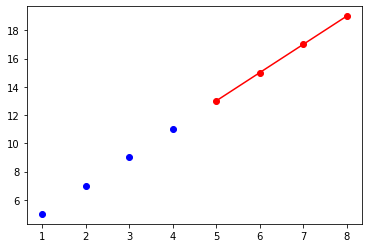

In [6]:
plt.plot([i[0] for i in xd], [i[0] for i in yd], color="blue", marker="o", linestyle="None")
plt.plot([i[0] for i in x_new], [i[0] for i in pr], color="red", marker="o")
plt.show()

In [7]:
# Mean-squared error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
print(mean_squared_error(y_true, y_pred))


0.375


# Red neuronal Básica


In [ ]:
# Basic Neural Network meant to recieve 32x32 images (Built for MNIST dataset)
class Brain(torch.nn.Module): # torch.nn.Module is a base class for all neuronal networks in pytroch
    def __init__(self):
        super().__init__()

        self.c1 = torch.nn.Conv2d(1, 6, 5) # Initial convolution layer 1 input image channel, 6 output channels, 5x5 conv kernel
        self.c2 = torch.nn.Conv2d(6, 16, 5) # Second convolution layer 6 input channels, 16 output channels, 5x5 conv kernel

        # IMPORTANT: Linear layers are calculated as follows: 
        # y = xA^T + b
        # y is output tensor, x is input tensor, A is trnasoformation tensor of shape (out, 1) where each value represents a node, b is the added bias of shape (out, 1) where each value represents node specific bias

        self.l1 = torch.nn.Linear(16*5*5, 120) # Linear layer from 400->120
        self.l2 = torch.nn.Linear(120, 84) # Linear layer from 120->84
        self.l3 = torch.nn.Linear(84, 10) # Linear layer from 84->10

    def forward(self, x):
        print(f"1: {x.shape}")
        
        x = self.c1(x)
        print(f"2: {x.shape}") # new image has size (32-5+1)x(32-5+1) channels 6
        
        x = torch.nn.functional.max_pool2d(torch.nn.functional.relu(x), (2, 2))
        print(f"3: {x.shape}") # max pooling reduces space by half along x and y axis so new image is (28/2)x(28/2) channels 6

        x = self.c2(x)
        print(f"4: {x.shape}") # new image has size (14-5+1)x(14-5+1) channels 16

        x = torch.nn.functional.max_pool2d(torch.nn.functional.relu(x), (2, 2))
        print(f"5: {x.shape}") # max pooling reduces space by half along x and y axis so new image is (10/2)x(10/2) channels 16

        x = torch.flatten(x, 1)
        print(f"6: {x.shape}") # flattening along the second dimension (remember indexing starts at 0) provides every image flattened into tensor of 16*5*5

        x = torch.nn.functional.relu(self.l1(x))
        print(f"7: {x.shape}") # normal linear transformation layer from 400 -> 120

        x = torch.nn.functional.relu(self.l2(x))
        print(f"8: {x.shape}") # normal linear transformation layer from 120 -> 84

        x = self.l3(x)
        print(f"9: {x.shape}") # normal linear transformation layer from 84 -> 10

        return x


In [ ]:
# Testing plz
inp = torch.randn(1, 1, 32, 32)
br = Brain()
out = br(inp)
print(out.shape)
print(out) # The torch.nn.Module automatically runs the forward function when passing in arguments directly to class instance


In [ ]:
# Make dummy data
dum = torch.Tensor([-1.2417,  0.3951,  0.8888, -1.7387, -1.9310,  1.0910,  1.1910, -0.3120, 0.5673,  0.6660])
dum = dum.view(1, -1)


In [ ]:
loss_func = torch.nn.MSELoss() # Declare a loss function with mean-squared error calc

In [ ]:
# Start training loop
optim = torch.optim.SGD(br.parameters(), lr=0.01)

for i in range(3):
    optim.zero_grad() # Gradients must be zeroed so they won't be added to each other
    out = br(inp) # Get the predicted output
    loss = loss_func(out, dum) # get the loss between predicted and target data
    loss.backward() # Calculate the backwards propagation gradients
    optim.step() # Backwards propagate